## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
import keras
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [31]:
print(x_train.shape)

print("No of samples in training = ",x_train.shape[0])

(60000, 28, 28)
No of samples in training =  60000


In [32]:
print(x_test.shape)

print("No of samples in test = ",x_test.shape[0])

(10000, 28, 28)
No of samples in test =  10000


### Find dimensions of an image in the dataset

In [33]:
x_train[0].shape

print("Dimesion of an image in dataset = ",x_train[0].shape)

Dimesion of an image in dataset =  (28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
num_classes = 10
y_train_encoded =  keras.utils.to_categorical(y_train,num_classes=num_classes)
y_test_encoded =  keras.utils.to_categorical(y_test,num_classes=num_classes)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train / 255

In [0]:
y_train = y_train / 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [38]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [50]:
fmnist_model = Sequential()

# 1st Conv Layer
fmnist_model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
fmnist_model.add(Activation('relu'))

# 2nd Conv Layer
fmnist_model.add(Convolution2D(32, 3, 3))
fmnist_model.add(Activation('relu'))

# Add a flatten layer
fmnist_model.add(Flatten())

# Add a dense layer
fmnist_model.add(Dense(128))
# with activation function as relu
fmnist_model.add(Activation('relu'))


# Add a final output dense layer
fmnist_model.add(Dense(num_classes))
fmnist_model.add(Activation('softmax'))

# model summary
fmnist_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_17 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_18 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               2359424   
_________________________________________________________________
activation_19 (Activation)   (None, 128)              

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [51]:
# compile with loss and optimizer
fmnist_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model2
fmnist_model.fit(x_train, y_train_encoded, epochs=10, 
          validation_data=(x_test, y_test_encoded), callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 249us/step - loss: 0.3669 - acc: 0.8685 - val_loss: 1.9625 - val_acc: 0.8752
Epoch 2/10
60000/60000 [==============================] - 14s 236us/step - loss: 0.2241 - acc: 0.9166 - val_loss: 1.8753 - val_acc: 0.8804
Epoch 3/10
60000/60000 [==============================] - 14s 238us/step - loss: 0.1636 - acc: 0.9399 - val_loss: 2.3694 - val_acc: 0.8500
Epoch 4/10
60000/60000 [==============================] - 14s 234us/step - loss: 0.1138 - acc: 0.9575 - val_loss: 2.1282 - val_acc: 0.8656
Epoch 5/10
60000/60000 [==============================] - 14s 237us/step - loss: 0.0754 - acc: 0.9715 - val_loss: 2.6656 - val_acc: 0.8327
Epoch 6/10
60000/60000 [==============================] - 14s 234us/step - loss: 0.0506 - acc: 0.9813 - val_loss: 2.6872 - val_acc: 0.8313
Epoch 7/10
60000/60000 [==============================] - 14s 234us/step - loss: 0.0358 - acc: 0.9870 - val_loss: 3.

In [52]:
loss_and_metrics = fmnist_model.evaluate(x_test, y_test_encoded)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 70us/step
[3.4279894996643065, 0.7859]


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [53]:
from keras.layers import Dropout

fmnist_model = Sequential()

# 1st Conv Layer
fmnist_model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
fmnist_model.add(Activation('relu'))

# 2nd Conv Layer
fmnist_model.add(Convolution2D(32, 3, 3))
fmnist_model.add(Activation('relu'))

# add Max Pooling
fmnist_model.add(MaxPooling2D(pool_size=(2,2)))

# add Dropout
fmnist_model.add(Dropout(0.25))

# Add a flatten layer
fmnist_model.add(Flatten())

# Add a dense layer
fmnist_model.add(Dense(128))
# with activation function as relu
fmnist_model.add(Activation('relu'))


# Add a final output dense layer
fmnist_model.add(Dense(num_classes))
fmnist_model.add(Activation('softmax'))

# model summary
fmnist_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_21 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_22 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4608)             

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


In [54]:
# compile with loss and optimizer
fmnist_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model2
fmnist_model.fit(x_train, y_train_encoded, epochs=10, 
          validation_data=(x_test, y_test_encoded), callbacks=callback_list, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.3992 - acc: 0.8562 - val_loss: 1.8107 - val_acc: 0.8846
Epoch 2/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.2610 - acc: 0.9037 - val_loss: 1.7453 - val_acc: 0.8888
Epoch 3/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.2136 - acc: 0.9199 - val_loss: 1.7298 - val_acc: 0.8891
Epoch 4/10
60000/60000 [==============================] - 15s 244us/step - loss: 0.1801 - acc: 0.9325 - val_loss: 2.3638 - val_acc: 0.8506
Epoch 5/10
60000/60000 [==============================] - 15s 242us/step - loss: 0.1532 - acc: 0.9422 - val_loss: 2.0098 - val_acc: 0.8725
Epoch 6/10
60000/60000 [==============================] - 15s 242us/step - loss: 0.1281 - acc: 0.9522 - val_loss: 1.8226 - val_acc: 0.8847
Epoch 7/10
60000/60000 [==============================] - 15s 245us/step - loss: 0.1114 - acc: 0.9577 - val_loss: 2.

In [55]:
loss_and_metrics = fmnist_model.evaluate(x_test, y_test_encoded)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 78us/step
[2.37483581905365, 0.8512]


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True, 
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             rotation_range=47) 
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

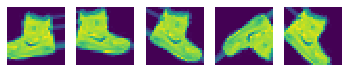

In [80]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [82]:
fmnist_model.fit_generator(datagen.flow(x_train, y_train_encoded),
                    samples_per_epoch=x_train.shape[0],
                    epochs=10,
                    validation_data=(x_test, y_test_encoded), callbacks=callback_list)

Epoch 1/10
   7/1875 [..............................] - ETA: 36s - loss: 2.3049 - acc: 0.0804

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=10, validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 34s 18ms/step - loss: 2.3029 - acc: 0.0986 - val_loss: 13.1308 - val_acc: 0.1423
Epoch 2/10
1875/1875 [==============================] - 33s 17ms/step - loss: 2.3027 - acc: 0.0980 - val_loss: 13.1307 - val_acc: 0.1422
Epoch 3/10
1875/1875 [==============================] - 33s 17ms/step - loss: 2.3027 - acc: 0.0992 - val_loss: 13.1307 - val_acc: 0.1426
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 2.3028 - acc: 0.0969 - val_loss: 13.1307 - val_acc: 0.1424
Epoch 5/10
1875/1875 [==============================] - 33s 17ms/step - loss: 2.3028 - acc: 0.0987 - val_loss: 13.1312 - val_acc: 0.1424
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 2.3027 - acc: 0.0976 - val_loss: 13.1308 - val_acc: 0.1424
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 2.3028 - acc: 0.1003 - val_loss: 13.1307 - val_acc: 0.1442
Epoch 8/10
1875/1875 [==============================

###  Report the final train and validation accuracy

In [83]:
loss_and_metrics = fmnist_model.evaluate(x_test, y_test_encoded)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 73us/step
[13.130700381469726, 0.1424]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [0]:
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

In [104]:
x_train_cifar.shape

(50000, 32, 32, 3)

In [93]:
y_train_cifar.shape

(50000, 1)

In [0]:
x_train_cifar = x_train_cifar / 255

In [0]:
y_train_cifar = y_train_cifar / 255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=False, 
                             width_shift_range=0.25,
                             height_shift_range=0.25,
                             rotation_range=47 # degree for img rotation
                             ) 


### **Prepare/fit the generator.**

In [0]:
datagen.fit(x_train_cifar)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

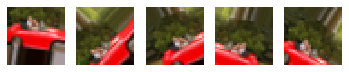

In [106]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_cifar[99:100], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()